# House Price Prediction

The main aim of this project is to predict the house prices. We have the 'kc' Sales Dataset.

## About Dataset:
This dataset contains house sale prices for King Country, which includes Seattle. It includes homes sold between May 2014 and May 2015.

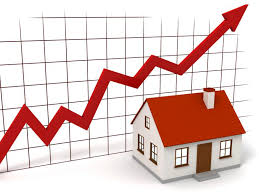

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.size

453873

In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [7]:
df.describe

<bound method NDFrame.describe of                id             date      price  bedrooms  bathrooms  \
0      7129300520  20141013T000000   221900.0         3       1.00   
1      6414100192  20141209T000000   538000.0         3       2.25   
2      5631500400  20150225T000000   180000.0         2       1.00   
3      2487200875  20141209T000000   604000.0         4       3.00   
4      1954400510  20150218T000000   510000.0         3       2.00   
5      7237550310  20140512T000000  1225000.0         4       4.50   
6      1321400060  20140627T000000   257500.0         3       2.25   
7      2008000270  20150115T000000   291850.0         3       1.50   
8      2414600126  20150415T000000   229500.0         3       1.00   
9      3793500160  20150312T000000   323000.0         3       2.50   
10     1736800520  20150403T000000   662500.0         3       2.50   
11     9212900260  20140527T000000   468000.0         2       1.00   
12      114101516  20140528T000000   310000.0         3 

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### No null values are present in the dataset

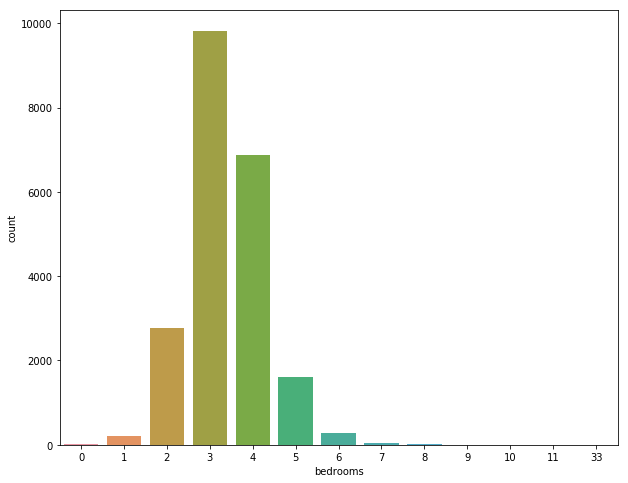

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x='bedrooms', data=df)

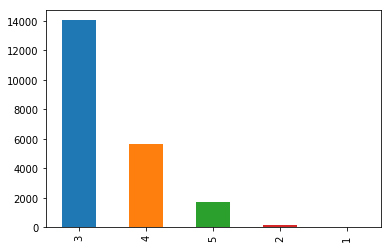

In [10]:
df.condition.value_counts().plot(kind='bar')

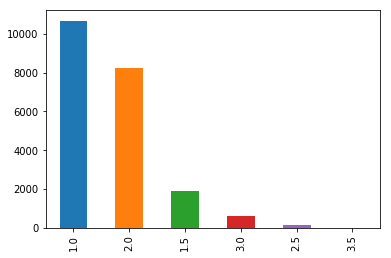

In [11]:
df.floors.value_counts().plot(kind='bar')

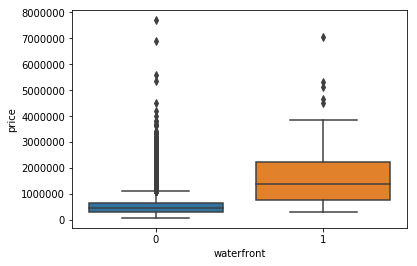

In [12]:
sns.boxplot(x='waterfront', y='price', data=df)

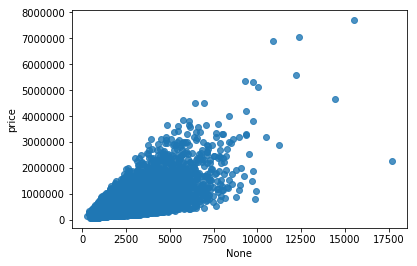

In [13]:
sns.regplot((df['sqft_living'] + df['sqft_basement']), df['price'], fit_reg=False)

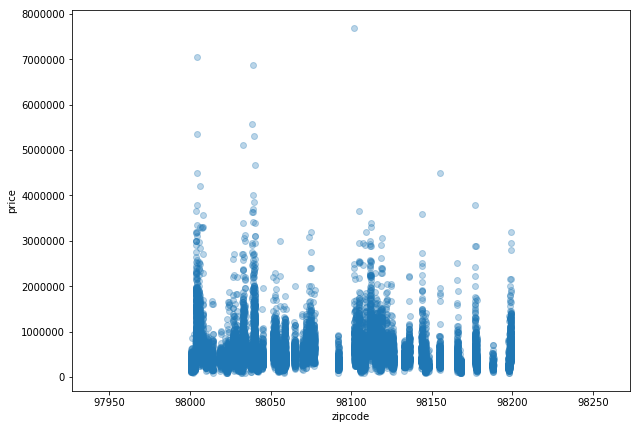

In [15]:
plt.figure(figsize=(10,7))
sns.regplot(df['zipcode'], df['price'], x_jitter=0.4, scatter_kws={'alpha':0.3}, fit_reg=False)

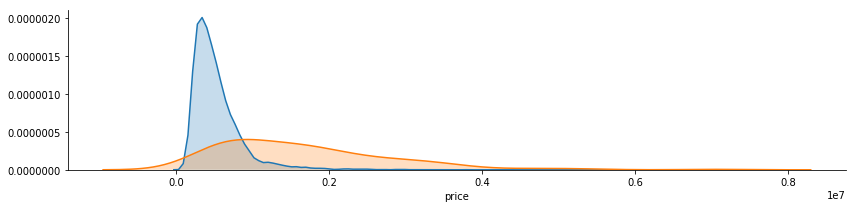

In [17]:
grp = sns.FacetGrid(df, hue='waterfront', aspect=4)
grp.map(sns.kdeplot, 'price', shade=True)

# Training a Linear Regression Model

## Train Test Split :

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
X = df.drop(['id','date', 'price'], axis=1) 
y = df['price']

# Creating and Training the Model

In [22]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [23]:
print(LR.intercept_)

6646990.454999616


In [25]:
pd.DataFrame(LR.coef_, X.columns, columns=['Coefficient'])

,Coefficient
bedrooms,-37269.763856
bathrooms,35937.972138
sqft_living,110.719980
sqft_lot,0.145043
floors,11521.161115
waterfront,550895.824634
view,51984.258678
condition,27986.792802
grade,96722.563856
sqft_above,71.259061


## Prediction of our Model :-

G:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


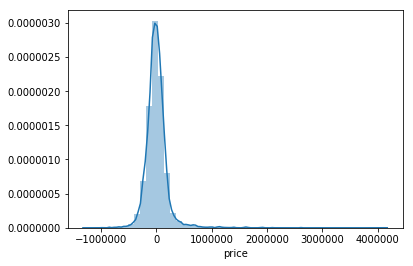

In [28]:
predictions = LR.predict(X_test)
sns.distplot((y_test - predictions), bins=50)

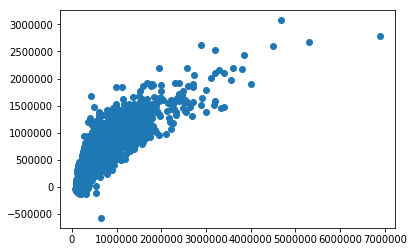

In [29]:
plt.scatter(y_test, predictions)

# Regression Evaluation Metrics
### Here are three common evaluation metrics for regression problems:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
2. Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [30]:
from sklearn import metrics

print('M.A.E :', metrics.mean_absolute_error(y_test, predictions))
print('M.S.E :', metrics.mean_squared_error(y_test, predictions))
print('R.M.S.E :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

M.A.E : 126021.85241879124
M.S.E : 41043239302.62759
R.M.S.E : 202591.31102450466


In [31]:
LR.score(X_test, y_test)

0.7074085330779525